In [5]:
from google.colab import files
uploaded = files.upload()






Saving S&P 500 Historical Data.csv to S&P 500 Historical Data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path = "S&P 500 Historical Data.csv"
df = pd.read_csv(file_path)
print(df.head())


         Date     Price      Open      High       Low   Vol. Change %
0  02/01/2025  5,956.06  5,939.38  6,147.54  5,908.49    NaN   -1.40%
1  01/01/2025  6,040.53  5,903.26  6,128.18  5,773.31  0.00K    2.70%
2  12/01/2024  5,881.63  6,040.11  6,099.97  5,832.30    NaN   -2.50%
3  11/01/2024  6,032.38  5,723.22  6,044.17  5,696.51    NaN    5.73%
4  10/01/2024  5,705.45  5,757.73  5,878.46  5,674.00    NaN   -0.99%


In [7]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date',inplace=True)
df['Price']=df['Price'].astype(str).str.replace(',','').astype(float)
df=df.sort_index()

In [8]:
df = df.copy()
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Daily Return'] = df['Price'].pct_change()
df['Volatility'] = df['Daily Return'].rolling(window=30).std()


In [9]:
df['Volatility'] = df['Daily Return'].rolling(window=30).std()
df['50-day MA'] = df['Price'].rolling(window=50).mean()
df['200-day MA'] = df['Price'].rolling(window=200).mean()

In [10]:
print(df.head())

              Price      Open      High       Low Vol. Change %  Daily Return  \
Date                                                                            
2019-01-03  2834.40  2,798.22  2,860.31  2,722.27  NaN    1.79%           NaN   
2019-01-04  2945.83  2,848.63  2,949.52  2,848.63  NaN    3.93%      0.039313   
2019-01-05  2752.06  2,952.33  2,954.13  2,750.52  NaN   -6.58%     -0.065778   
2019-01-06  2941.76  2,751.53  2,964.15  2,728.81  NaN    6.89%      0.068930   
2019-01-07  2980.38  2,971.41  3,027.98  2,952.22  NaN    1.31%      0.013128   

            Volatility  50-day MA  200-day MA  
Date                                           
2019-01-03         NaN        NaN         NaN  
2019-01-04         NaN        NaN         NaN  
2019-01-05         NaN        NaN         NaN  
2019-01-06         NaN        NaN         NaN  
2019-01-07         NaN        NaN         NaN  


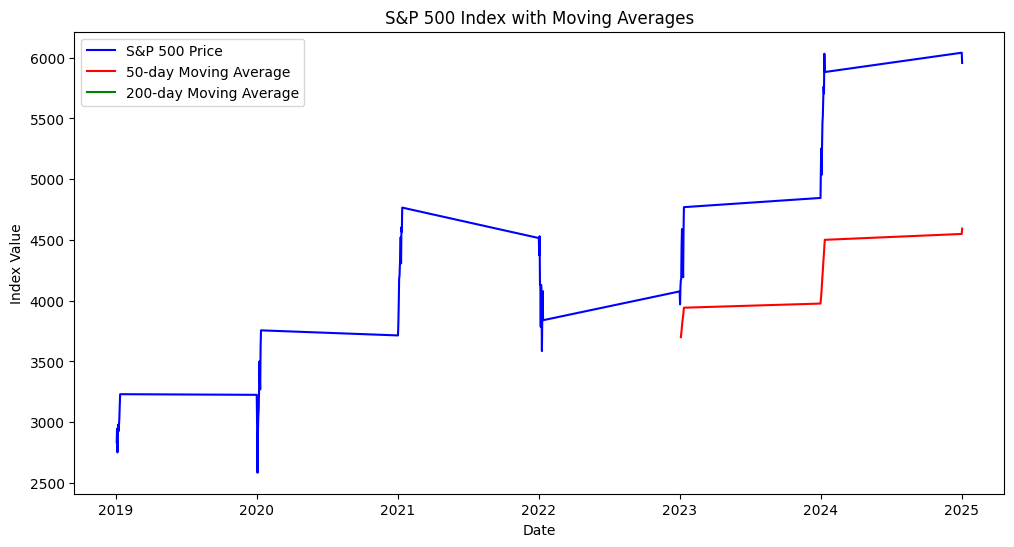

In [11]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label="S&P 500 Price", color='blue')
plt.plot(df.index, df['50-day MA'], label="50-day Moving Average", color='red')
plt.plot(df.index, df['200-day MA'], label="200-day Moving Average", color='green')
plt.legend()
plt.title("S&P 500 Index with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.show()

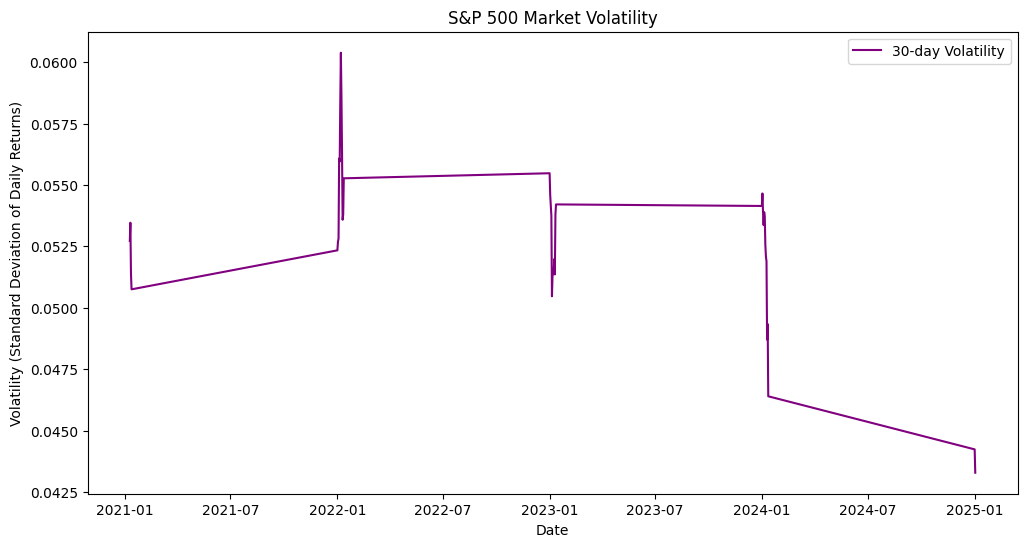

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], label="30-day Volatility", color='purple')
plt.legend()
plt.title("S&P 500 Market Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation of Daily Returns)")
plt.show()